In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
from matplotlib import pyplot
import matplotlib.pyplot as plt
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import seaborn as sns
from collections import Counter
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout
import PIL.Image
plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
df_i = pd.read_csv("/home/ec2-user/fashion_data_extracted/fashion-dataset/images.csv",nrows=5000)
df_s = pd.read_csv("/home/ec2-user/fashion_data_extracted/fashion-dataset/styles.csv",nrows=5000)

In [5]:
df_s['productDisplayName'] = df_s['productDisplayName'].str.lower()

In [6]:
def remove_stop_words(text):
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text



def remove_punctuation(text):
    tokenizer = RegexpTokenizer(r'\w+')
    text = tokenizer.tokenize(text)
    text = " ".join(text)
    return text


df_s['cleaned'] = df_s['productDisplayName'].astype(str).apply(func = remove_stop_words)
df_s['cleaned'] = df_s['cleaned'].astype(str).apply(func=remove_punctuation)

In [7]:
df_s.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,cleaned
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,turtle check men navy blue shirt,turtle check men navy blue shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,peter england men party blue jeans,peter england men party blue jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,titan women silver watch,titan women silver watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,manchester united men solid black track pants,manchester united men solid black track pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,puma men grey t-shirt,puma men grey t shirt


In [15]:
df_s = df_s.rename(columns={'id':'img_id'})

In [8]:
df_i[['img_id','ext']] = df_i['filename'].str.split(".",expand=True) 

In [9]:
df_i.head()

,filename,link,img_id,ext
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,15970,jpg
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,39386,jpg
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,59263,jpg
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,21379,jpg
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,53759,jpg


In [10]:
df_i.drop( columns ='filename',inplace=True)

In [11]:
df_i.drop( columns ='ext',inplace=True)

In [12]:
df_i.head()

,link,img_id
0,http://assets.myntassets.com/v1/images/style/p...,15970
1,http://assets.myntassets.com/v1/images/style/p...,39386
2,http://assets.myntassets.com/v1/images/style/p...,59263
3,http://assets.myntassets.com/v1/images/style/p...,21379
4,http://assets.myntassets.com/v1/images/style/p...,53759


In [13]:
df_i['img_id'] = df_i['img_id'].astype(int)

In [16]:
df = pd.merge(df_s,df_i,on='img_id')

In [17]:
df_i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   link    5000 non-null   object
 1   img_id  5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.2+ KB


In [18]:
df.dropna(inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4951 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   img_id              4951 non-null   int64 
 1   gender              4951 non-null   object
 2   masterCategory      4951 non-null   object
 3   subCategory         4951 non-null   object
 4   articleType         4951 non-null   object
 5   baseColour          4951 non-null   object
 6   season              4951 non-null   object
 7   year                4951 non-null   int64 
 8   usage               4951 non-null   object
 9   productDisplayName  4951 non-null   object
 10  cleaned             4951 non-null   object
 11  link                4951 non-null   object
dtypes: int64(2), object(10)
memory usage: 502.8+ KB


In [20]:
import PIL.Image

In [28]:
def display_img(url,ax,fig):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))

    plt.imshow(img)

def plot_heatmap(keys, values, labels, url, text):
        
        gs = gridspec.GridSpec(2, 2, width_ratios=[4,1], height_ratios=[4,1]) 
        fig = plt.figure(figsize=(25,3))
        
        
        ax = plt.subplot(gs[0])
        
        ax = sns.heatmap(np.array([values]), annot=np.array([labels]))
        ax.set_xticklabels(keys) 
        ax.set_title(text)
        
        
        ax = plt.subplot(gs[1])
        
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        
    
        display_img(url, ax, fig)
        
    
        plt.show()

In [23]:
def plot_heatmap_image(doc_id, vec1, vec2, url, text, model):

    
    intersection = set(vec1.keys()) & set(vec2.keys()) 

   
    for i in vec2:
        if i not in intersection:
            vec2[i]=0

    keys = list(vec2.keys())
    values = [vec2[x] for x in vec2.keys()]
    
    
    if model == 'bag_of_words':
        labels = values
  


    plot_heatmap(keys, values, labels, url, text)
    
    

    
def text_to_vector(text):
    word = re.compile(r'\w+')
    words = word.findall(text)
    
    return Counter(words) 

In [24]:
def get_result(doc_id, content_a, content_b, url, model):
    text1 = content_a
    text2 = content_b
    vector1 = text_to_vector(text1)
    vector2 = text_to_vector(text2)

    plot_heatmap_image(doc_id, vector1, vector2, url, text2, model)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(df['cleaned'])
title_features.get_shape()

(4951, 2469)

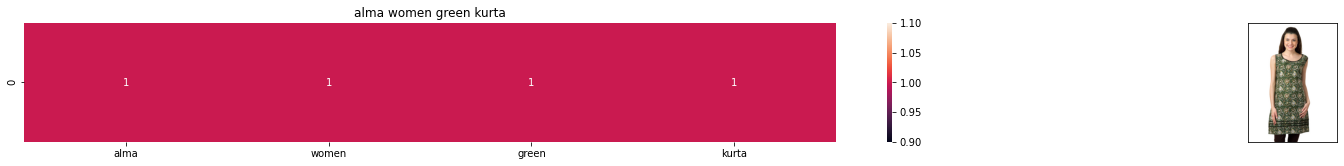

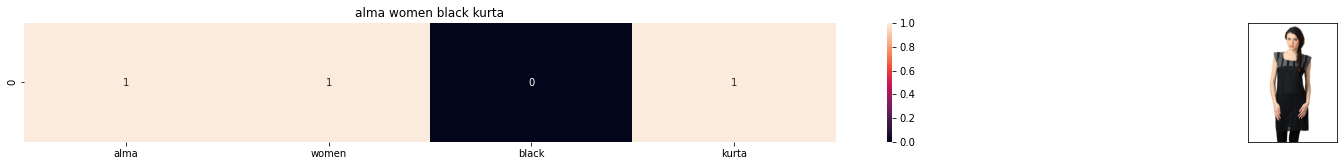

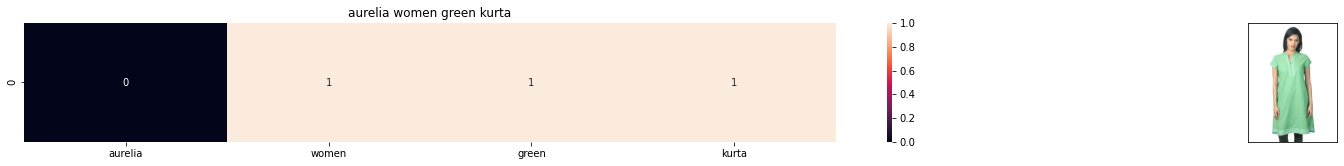

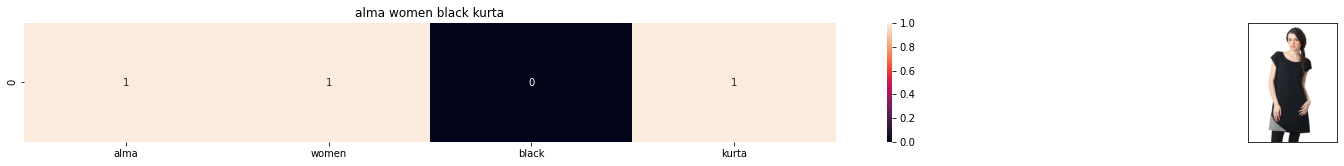

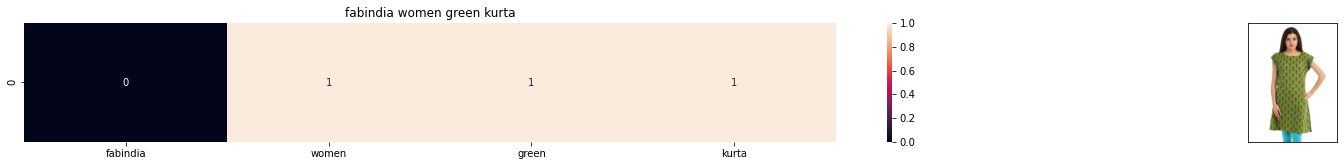

In [29]:
def bag_of_words_model(doc_id, num_results):

    pairwise_dist = pairwise_distances(title_features,title_features[doc_id],metric='cosine')
    
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    df_indices = list(df.index[indices])
    for i in range(0,len(indices)):
        get_result(indices[i],df['cleaned'].loc[df_indices[0]], df['cleaned'].loc[df_indices[i]], df['link'].loc[df_indices[i]], 'bag_of_words')


bag_of_words_model(1885, 5)